Name: SARAN SADASIVAM
Reg. No: 212225040385
MODEL COEFFICIENTS:
  enginesize:    4523.40
  horsepower:    1694.22
     citympg:    -392.57
  highwaympg:    -816.36
   Intercept:   13223.41

MODEL PERFORMANCE:
         MSE: 16471505.90
        RMSE:    4058.51
   R.squared:       0.79


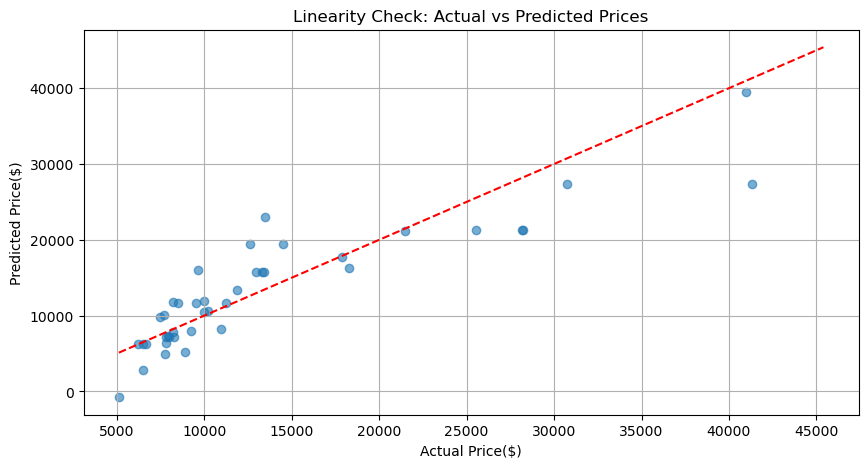


Durbin-Warson Statistic: 2.28 
(Values Close to 2 indicate no autocorrelation)


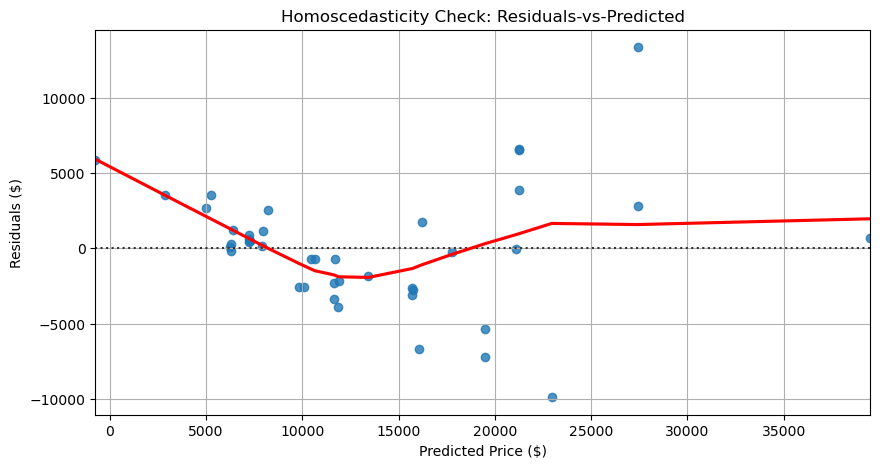

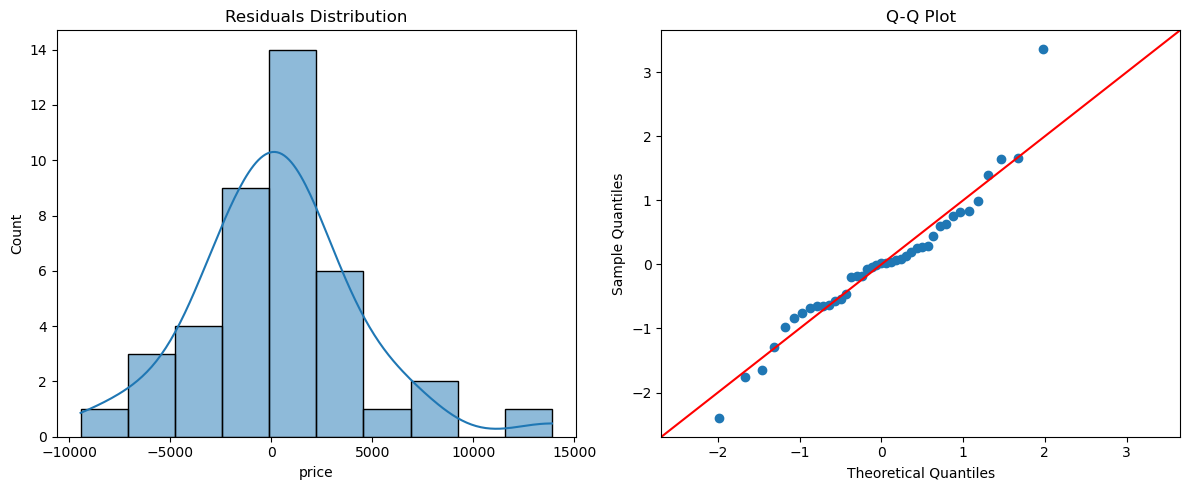

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()
X = df[['enginesize', 'horsepower', 'citympg', 'highwaympg']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Name: SARAN SADASIVAM')
print('Reg. No: 212225040385')
print("MODEL COEFFICIENTS:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:>12}: {coef:>10.2f}")
print(f"{'Intercept':>12}: {model.intercept_:>10.2f}")
print("\nMODEL PERFORMANCE:")

print(f"{'MSE':>12}: {mean_squared_error(y_test, y_pred):>10.2f}")
print(f"{'RMSE':>12}: {np.sqrt(mean_squared_error(y_test, y_pred)):>10.2f}")
print(f"{'R.squared':>12}: {r2_score(y_test, y_pred):>10.2f}")
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted Price($)")
plt.grid(True)
plt.show()
residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Warson Statistic: {dw_test:.2f}", 
      "\n(Values Close to 2 indicate no autocorrelation)")
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Homoscedasticity Check: Residuals-vs-Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()